<a href="https://colab.research.google.com/github/Capacitator/Hotdog-detection/blob/main/Hotdog_vs_Not_hotdog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

import tensorflow_datasets as tfds



In [ ]:
ds, ds_info = tfds.load('food101', shuffle_files= True, as_supervised = True, with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/75750 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/food101/2.0.0.incompleteUNDERL/food101-train.tfrecord*...:   0%|          …

Generating validation examples...:   0%|          | 0/25250 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/food101/2.0.0.incompleteUNDERL/food101-validation.tfrecord*...:   0%|     …

Dataset food101 downloaded and prepared to /root/tensorflow_datasets/food101/2.0.0. Subsequent calls will reuse this data.


In [ ]:
ds_2, ds_info_2 = tfds.load('rock_paper_scissors', shuffle_files= True, as_supervised = True, with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/2520 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/rock_paper_scissors/3.0.0.incompleteIGQ8JT/rock_paper_scissors-train.tfrec…

Generating test examples...:   0%|          | 0/372 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/rock_paper_scissors/3.0.0.incompleteIGQ8JT/rock_paper_scissors-test.tfreco…

Dataset rock_paper_scissors downloaded and prepared to /root/tensorflow_datasets/rock_paper_scissors/3.0.0. Subsequent calls will reuse this data.


In [ ]:
test_set,  = ds_2["test"]


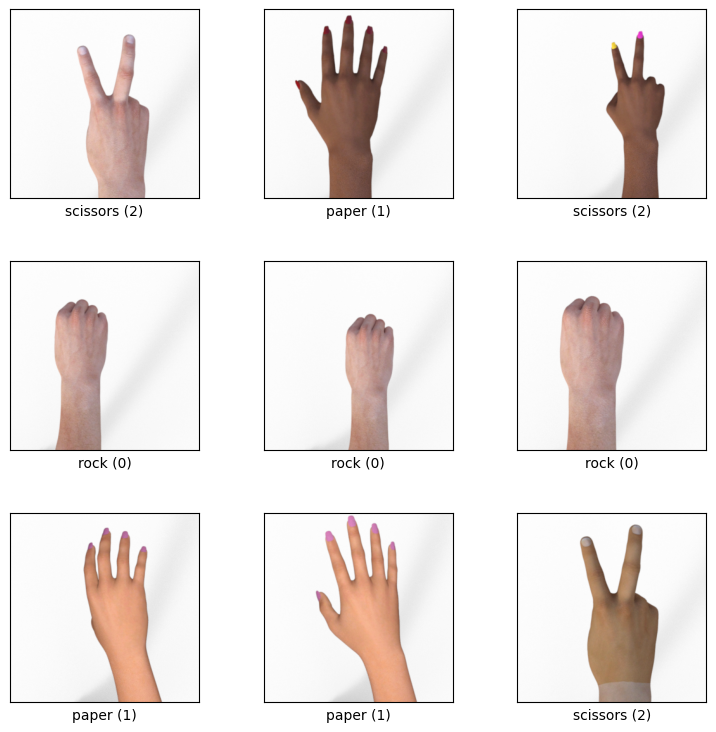

In [ ]:
fig = tfds.show_examples(test_set, ds_info_2)

In [ ]:
train_data_set, validation_data_set = ds["train"], ds["validation"]

In [ ]:
fig = tfds.show_examples(train_data_set, ds_info)

In [ ]:
MAX_SIDE_LENGTH = 128                       ## side length of images we want to set
HOT_DOG_CLASS = 55                          ## Class name of hotdogs in data set

train_data_set = train_data_set.map (
    lambda image, label : ( tf.cast(tf.image.resize(image, [MAX_SIDE_LENGTH, MAX_SIDE_LENGTH]), dtype=tf.int32),
    tf.cast(label == HOT_DOG_CLASS, dtype=tf.int32)
))

## resizing the image to create uniformity and then casting it in suitable datatype
## lambda is basically assigning image and lable to what we want it to based on our conditions
validation_data_set = validation_data_set.map (
    lambda image, label : ( tf.cast(tf.image.resize(image, [MAX_SIDE_LENGTH, MAX_SIDE_LENGTH]), dtype=tf.int32),
    tf.cast(label == HOT_DOG_CLASS, dtype=tf.int32)
))



In [ ]:
test_set = test_set.map (
    lambda image, label : ( tf.cast(tf.image.resize(image, [MAX_SIDE_LENGTH, MAX_SIDE_LENGTH]), dtype=tf.int32)
    ))

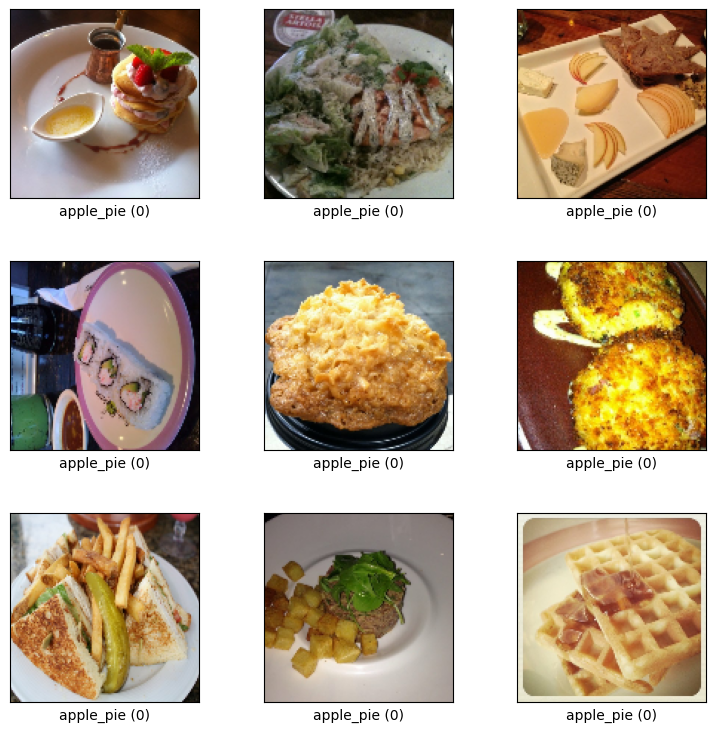

In [ ]:
fig = tfds.show_examples(train_data_set, ds_info)

In [ ]:
trian_hd_size, valid_hd_size = 750, 250 ## documentation se
train_hotdogs = train_data_set.filter(lambda image, label : label== 1).repeat(3)
train_not_hotdogs = train_data_set.filter(lambda image, label : label== 0)


In [ ]:
valid_hotdogs = train_data_set.filter(lambda image, label : label== 1).repeat(3)
valid_not_hotdogs = train_data_set.filter(lambda image, label : label== 0)
##
##


In [ ]:
batch_size = 16

train_data_set = tf.data.Dataset.sample_from_datasets([train_hotdogs, train_not_hotdogs],
 [0.5,0.5],
stop_on_empty_dataset = True)
 ## This is to take images from both sets equally since there the non hotdogs far outweigh
    ## hotdogs
train_data_set = train_data_set.cache().batch(batch_size).prefetch(tf.data.AUTOTUNE)
## We cache the dataset so that we don't have to read and open the dataset again and again
## then we take dataset in batches of 16
## also we prefetch the data while it is executing something something

validation_data_set = tf.data.Dataset.sample_from_datasets([valid_hotdogs, valid_not_hotdogs],
 [0.5,0.5],
stop_on_empty_dataset = True)

validation_data_set = validation_data_set.cache().batch(batch_size).prefetch(tf.data.AUTOTUNE)


In [ ]:
for image_batch, label_batch in train_data_set.take(1):
  print(image_batch)
  print(label_batch)



tf.Tensor(
[[[[211 192 166]
   [209 191 170]
   [219 208 187]
   ...
   [216 205 181]
   [205 192 167]
   [212 197 172]]

  [[202 186 159]
   [207 192 168]
   [210 199 177]
   ...
   [220 210 189]
   [205 193 169]
   [213 199 173]]

  [[201 186 160]
   [214 201 180]
   [214 202 183]
   ...
   [218 209 191]
   [215 204 182]
   [213 200 175]]

  ...

  [[232 224 211]
   [233 225 215]
   [234 225 216]
   ...
   [231 222 210]
   [230 220 207]
   [230 218 203]]

  [[233 225 208]
   [230 221 209]
   [234 225 216]
   ...
   [228 219 208]
   [232 223 209]
   [233 221 206]]

  [[234 226 207]
   [236 226 213]
   [235 225 216]
   ...
   [231 222 210]
   [233 223 210]
   [232 220 205]]]


 [[[  1   1   1]
   [  1   1   1]
   [  1   1   1]
   ...
   [101 116 123]
   [124 137 145]
   [141 152 156]]

  [[  1   1   1]
   [  1   1   1]
   [  1   1   1]
   ...
   [ 80  95 102]
   [ 94 107 115]
   [107 118 122]]

  [[  1   1   1]
   [  1   1   1]
   [  1   1   1]
   ...
   [136 146 147]
   [138 149 153]


# Neural Net implementation

In [ ]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.2)

])
## All I could gather was is that we flip it and it goes from negative 20 percent pi to positive 20 percent pi

In [ ]:
for i, _ in ds["train"].take(2):
  image = i

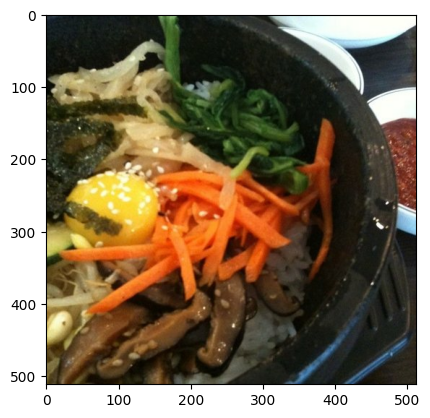

In [ ]:
plt.imshow(image)

In [ ]:
image = tf.cast(tf.expand_dims(image,0), tf.float32) ## cast it through batch so that we can put it in data_aug, in short exapnd
image /= 255.0

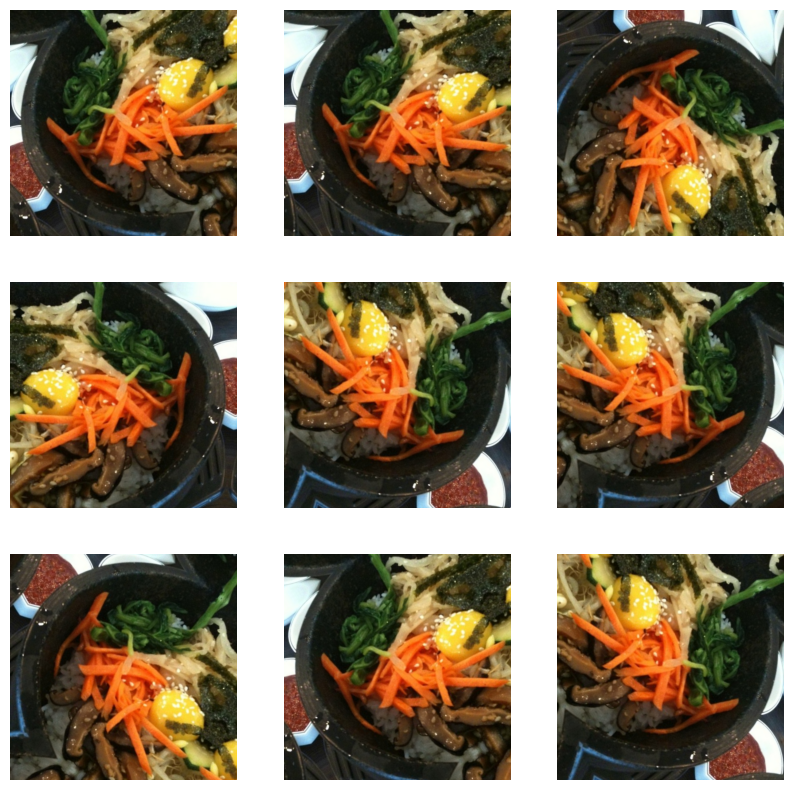

In [ ]:
plt.figure(figsize = (10,10))
for i in range(9):
  augmented_image = data_augmentation(image)
  ax = plt.subplot(3,3,i+1)
  plt.imshow(augmented_image[0])
  plt.axis("off")


In [ ]:
random.seed(0)
model = models.Sequential()
model.add(layers.Rescaling(1./255)) ##Shift scale from 0 - 255 to 0 to 1
model.add(data_augmentation)
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (MAX_SIDE_LENGTH, MAX_SIDE_LENGTH, 3))) ## 1st conv layer
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Dropout(0.15)) ## added some dropout layers, switched off 25% layers so that randomness remains
model.add(layers.Conv2D(32, (3,3), activation = 'relu', kernel_regularizer = tf.keras.regularizers.l2(l = 0.01))) ## 2nd layer  ## regularizer ensure the weights don't change superfast
model.add(layers.MaxPooling2D(2,2) )
model.add(layers.Dropout(0.15))
model.add(layers.Conv2D(16, (3,3), activation = 'relu',kernel_regularizer = tf.keras.regularizers.l2(l = 0.01) )) ## 3rd layer
model.add(layers.Dropout(0.15))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation = 'relu')) # Dense here means that the input goes to every single node
model.add(layers.Dense(1)) ##one node at the end which tells us 0 or 1


In [ ]:
le = 0.0001
model.compile(optimizer = tf.keras.optimizers.Adam(le),
                      loss =  tf.keras.losses.BinaryCrossentropy(from_logits=True),
                       metrics = 'accuracy')
          #Optimizers to get lesser error, not sure why Adam and what other optimizers are there
               ## loss function is always Crossentropy for binary classification
               ## from logits = true to let the loss function know that we are not going to project from 0 to 1 we

Model is compiled


In [ ]:
e = 50
history = model.fit(
    train_data_set,
    validation_data = validation_data_set,
    epochs=e,
    verbose = 1

)


Epoch 1/50
289/289 [==============================] - 578s 2s/step - loss: 1.1044 - accuracy: 0.5133 - val_loss: 0.9891 - val_accuracy: 0.4956
Epoch 2/50
289/289 [==============================] - 4s 14ms/step - loss: 0.9304 - accuracy: 0.5302 - val_loss: 0.8700 - val_accuracy: 0.5542
Epoch 3/50
289/289 [==============================] - 4s 14ms/step - loss: 0.8480 - accuracy: 0.5440 - val_loss: 0.8091 - val_accuracy: 0.5690
Epoch 4/50
289/289 [==============================] - 4s 16ms/step - loss: 0.8053 - accuracy: 0.5382 - val_loss: 0.7761 - val_accuracy: 0.5643
Epoch 5/50
289/289 [==============================] - 4s 14ms/step - loss: 0.7746 - accuracy: 0.5637 - val_loss: 0.7527 - val_accuracy: 0.5625
Epoch 6/50
289/289 [==============================] - 5s 16ms/step - loss: 0.7555 - accuracy: 0.5743 - val_loss: 0.7325 - val_accuracy: 0.5866
Epoch 7/50
289/289 [==============================] - 4s 14ms/step - loss: 0.7400 - accuracy: 0.5791 - val_loss: 0.7174 - val_accuracy: 0.6044

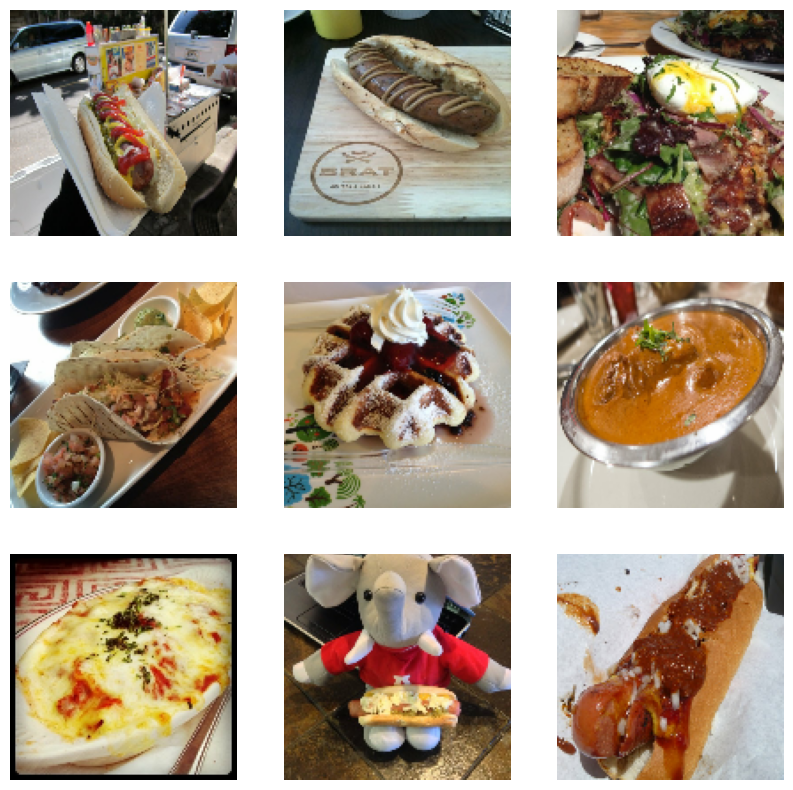

In [ ]:
plt.figure(figsize=(10, 10))
for image_batch, label_batch in validation_data_set.take(3):
  images = image_batch
  labels = label_batch

for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(images[i])
  plt.axis("off")


In [ ]:
  labels[:9]

<tf.Tensor: shape=(9,), dtype=int32, numpy=array([1, 1, 0, 0, 0, 0, 0, 1, 1], dtype=int32)>

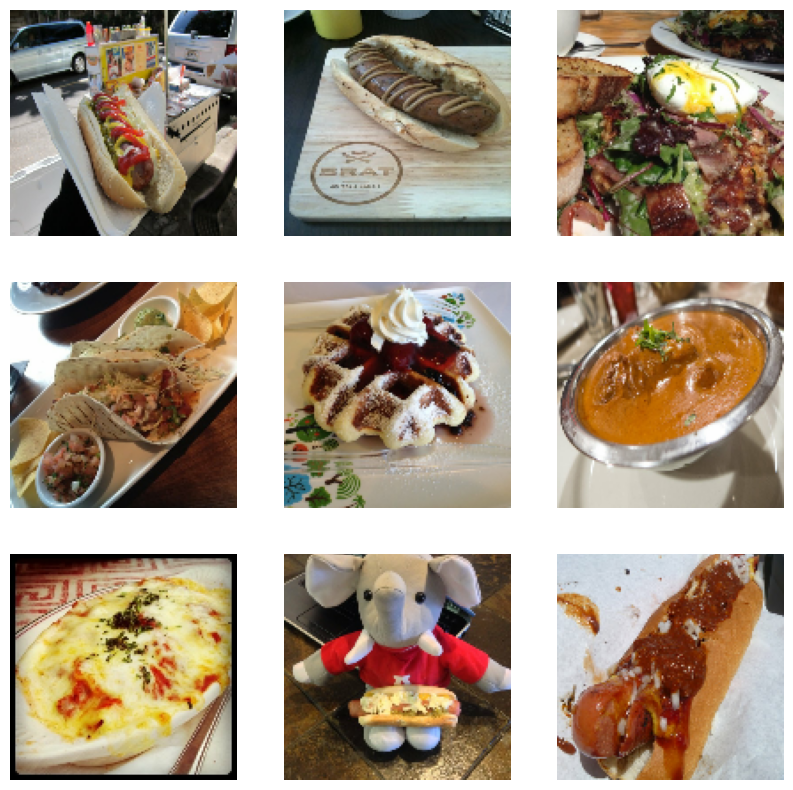

In [ ]:
plt.figure(figsize=(10, 10))
for image_batch, label_batch in test_set.take(0):
  images = image_batch
  labels = label_batch

for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(images[i])
  plt.axis("off")